In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import os

In [198]:
dir = "./tests/data/output"
# Boxplot input .pkl files are simply a pandas dataframe. First column is determinant of covariance matrix. Next N columns by N rows is the adjacency matrix
files = [f for f in os.listdir(dir) if f.startswith("boxplot")]

boxplot_dat = pd.DataFrame(columns=['Connections', 'Slope'])

for file in files:
    df = pd.read_pickle(os.path.join(dir, file))
    
    covariances = df.iloc[:, 0].values
    adj = df.iloc[:, 1:].values

    connections = np.sum(adj, axis=1)
    if max(connections) > 10:
        print(file)
  
    kp = np.arange(len(covariances))
    slopes = np.ndarray((len(connections), 1))
    for i in kp:    
        slope, _, _, _, _ = scipy.stats.linregress(kp[max(0, i-2):i+2], covariances[max(0, i-2):i+2])
        slopes[i] = slope

    for i in range(len(slopes)):
        boxplot_dat.loc[len(boxplot_dat)] = [connections[i], slopes[i][0]]

    

boxplot_input_V2_03_fg_0055_id_0172.pkl


In [232]:
# Calculate deadband of points near 0

# Calculate absolute differences from 0
absolute_diff = np.abs(boxplot_dat['Slope'].values - 0)

# Get indices of the 50 closest points
indices = np.argsort(absolute_diff)[:50]

# Get the 100 closest points
closest_points = boxplot_dat['Slope'].iloc[indices]
deadband = [min(closest_points), max(closest_points)]

print(deadband)

[-1.7604288571263544e-22, 2.0193983359356332e-22]


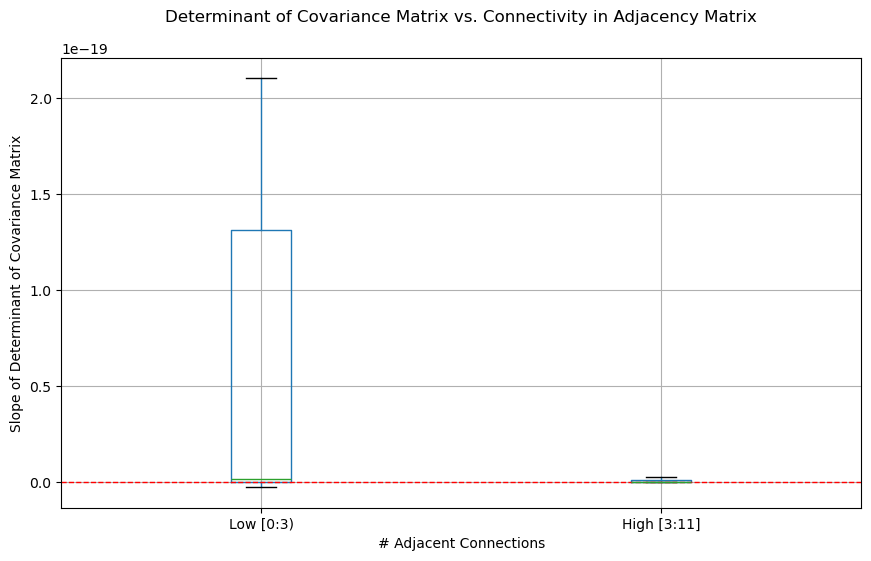

In [225]:
bins = [0, 3, int(np.max(boxplot_dat['Connections']))]
labels = [f'Low [{bins[0]}:{bins[1]})', f'High [{bins[1]}:{bins[2]}]']

# Assign categories based on the 'value' column
boxplot_dat['category'] = pd.cut(boxplot_dat['Connections'], bins=bins, labels=labels)

# Exclude the 'High' category
#filtered_df = boxplot_dat[boxplot_dat['category'] != f'High [{bins[2]}:{bins[3]}]']

# Plot the box plots
ax = boxplot_dat.boxplot(column='Slope', by='category', figsize=(10, 6), showfliers=False)
fig = ax.get_figure()
#ax.set_yscale('log')
# Add a horizontal red line at 0
ax.axhline(y=0, color='r', linestyle='--', linewidth=1)
fig.suptitle('Determinant of Covariance Matrix vs. Connectivity in Adjacency Matrix')
ax.set_title('')

# Set plot labels and title
ax.set_xlabel('# Adjacent Connections')
ax.set_ylabel('Slope of Determinant of Covariance Matrix')

# Show the plot
plt.show()

/var/folders/f2/n4wh395135l74l0znlgvh6r40000gn/T/ipykernel_28213/3308809688.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xticklabels([f'Keyframes with Positive Slope (n={counts[0]})', f'Keyframes with Negative Slope (n={counts[1]})'], fontsize=14)


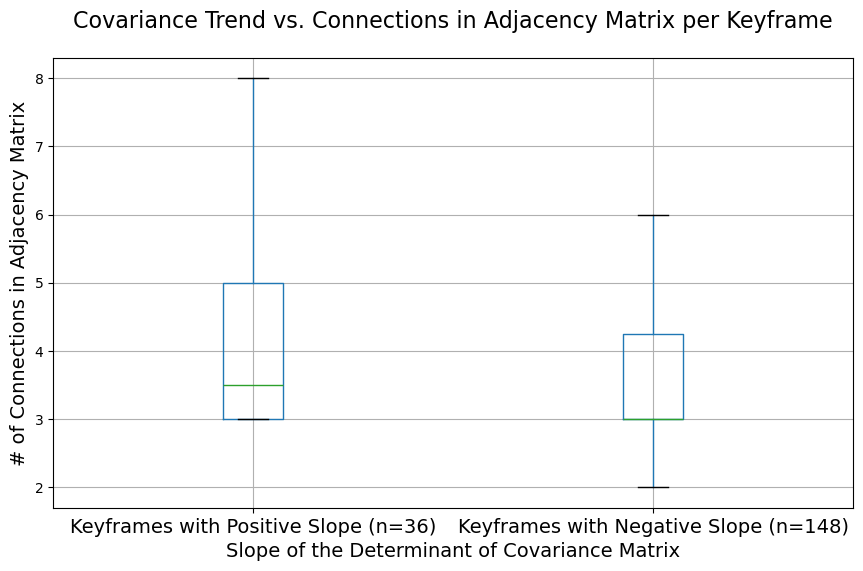

In [265]:
#bins = [np.min(boxplot_dat['Slope']), deadband[0], deadband[1], np.max(boxplot_dat['Slope'])]
#labels = [f'Decreasing', f'Excluded', f'Increasing']

bins = [np.min(boxplot_dat['Slope']), 0, np.max(boxplot_dat['Slope'])]
labels = [f'Decreasing Covariance', f'Increasing Covariance']

# Assign categories based on the 'value' column
boxplot_dat['slope_trend'] = pd.cut(boxplot_dat['Slope'], bins=bins, labels=labels)

counts = boxplot_dat.groupby('slope_trend', observed=True).size()

# Plot the box plots
ax = boxplot_dat.boxplot(column='Connections', by='slope_trend', figsize=(10, 6), showfliers=False)

fig = ax.get_figure()

fig.suptitle('Covariance Trend vs. Connections in Adjacency Matrix per Keyframe', fontsize=16)
ax.set_title('')

# Set plot labels and title
ax.set_xlabel('Slope of the Determinant of Covariance Matrix', fontsize=14)
ax.set_ylabel('# of Connections in Adjacency Matrix', fontsize=14)
ax.set_xticklabels([f'Keyframes with Positive Slope (n={counts[0]})', f'Keyframes with Negative Slope (n={counts[1]})'], fontsize=14)

# Show the plot
plt.show()

In [240]:
counts

slope_trend
Decreasing Covariance     36
Increasing Covariance    148
dtype: int64